In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import math
import scipy.stats as gaus
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_excel("data/data_bayes.xlsx")
df

ti   ci drug
0   5.1  3.5    X
1   4.9  3.0    X
2   4.7  3.2    X
3   4.6  3.1    X
4   7.0  3.2    Y
5   6.4  2.9    Y
6   6.9  3.1    Y
7   5.5  2.3    Y
8   6.3  2.5    Z
9   6.5  3.0    Z
10  6.2  3.4    Z
11  5.9  3.0    Z

In [3]:
# Chia dữ liệu thành 2 phần: 60% cho tập huấn luyện và 40% cho tập kiểm tra
df_train, df_test = train_test_split(df, test_size=0.4, random_state=16)
df_train

ti   ci drug
10  6.2  3.4    Z
4   7.0  3.2    Y
3   4.6  3.1    X
1   4.9  3.0    X
5   6.4  2.9    Y
11  5.9  3.0    Z
9   6.5  3.0    Z

In [4]:
df_train.mean(numeric_only=True)

ti    5.928571
ci    3.085714
dtype: float64

In [5]:
df_train.std(numeric_only=True)

ti    0.875051
ci    0.167616
dtype: float64

Mean (Giá trị trung bình):
μ_ti = 5.928571
μ_ci = 3.085714

Standard Deviation (Độ lệch chuẩn):
σ_ti = 0.875051
σ_ci = 0.167616


In [6]:
df_train['drug'].value_counts()

drug
Z    3
Y    2
X    2
Name: count, dtype: int64

In [7]:
grouped_stats = df_train.groupby('drug').agg(['mean', 'std'])
grouped_stats

ti                  ci          
      mean       std      mean       std
drug                                    
X     4.75  0.212132  3.050000  0.070711
Y     6.70  0.424264  3.050000  0.212132
Z     6.20  0.300000  3.133333  0.230940

Giả sử các phân phối trên từng đặc trưng theo từng nhóm drug là Gaussian Distribution (or Normal Distribution).

Hướng dẫn sinh viên phân lớp [ti, ci] = [6.9, 3.1] theo Naive Bayes Gaussian Distribution.

Yêu cầu: Tính xác suất cho từng lớp X, Y, Z dựa trên công thức của Gaussian Naive Bayes:

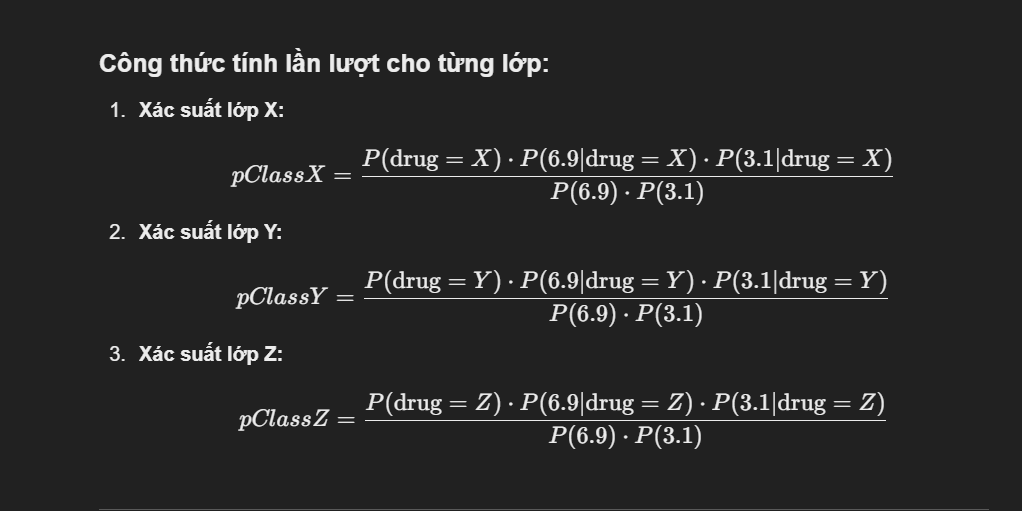

In [8]:
model = GaussianNB()
model.fit(df_train[['ti', 'ci']], df_train['drug'])

GaussianNB()

In [9]:
# Định nghĩa hàm tính mật độ xác suất Gaussian (Gaussian PDF)
def GaussianProb(x_value, g_mean, g_std):
    # Tính phần đầu của công thức Gaussian
    x1 = 1 / math.sqrt(2 * math.pi * (g_std ** 2))
    
    # Tính phần mũ e^(...)
    exp1 = math.exp(-0.5 * ((x_value - g_mean) / g_std) ** 2)
    
    # Trả về kết quả của công thức Gaussian
    return x1 * exp1


In [10]:
# Tính mean và std cho các đặc trưng 'ti' và 'ci' theo từng nhóm 'drug'
grouped_stats = df_train.groupby('drug').agg(['mean', 'std'])

# Ví dụ: Mẫu mới cần phân lớp [ti=6.9, ci=3.1]
sample = [6.9, 3.1]

# Tính xác suất cho từng lớp (X, Y, Z)
probabilities = {}
for drug in grouped_stats.index:
    mean_ti, std_ti = grouped_stats.loc[drug, ('ti', 'mean')], grouped_stats.loc[drug, ('ti', 'std')]
    mean_ci, std_ci = grouped_stats.loc[drug, ('ci', 'mean')], grouped_stats.loc[drug, ('ci', 'std')]
    
    # Tính xác suất cho 'ti' và 'ci'
    p_ti = GaussianProb(sample[0], mean_ti, std_ti)
    p_ci = GaussianProb(sample[1], mean_ci, std_ci)
    
    # Tính xác suất tổng cho lớp hiện tại
    probabilities[drug] = p_ti * p_ci

# Dự đoán lớp có xác suất lớn nhất
class_predicted = max(probabilities, key=probabilities.get)

# In kết quả
print(f"Xác suất của từng lớp: {probabilities}")
print(f"Lớp được dự đoán: {class_predicted}")

Xác suất của từng lớp: {'X': 4.0860917310483903e-22, 'Y': 1.5390720245720295, 'Z': 0.14942715315620494}
Lớp được dự đoán: Y


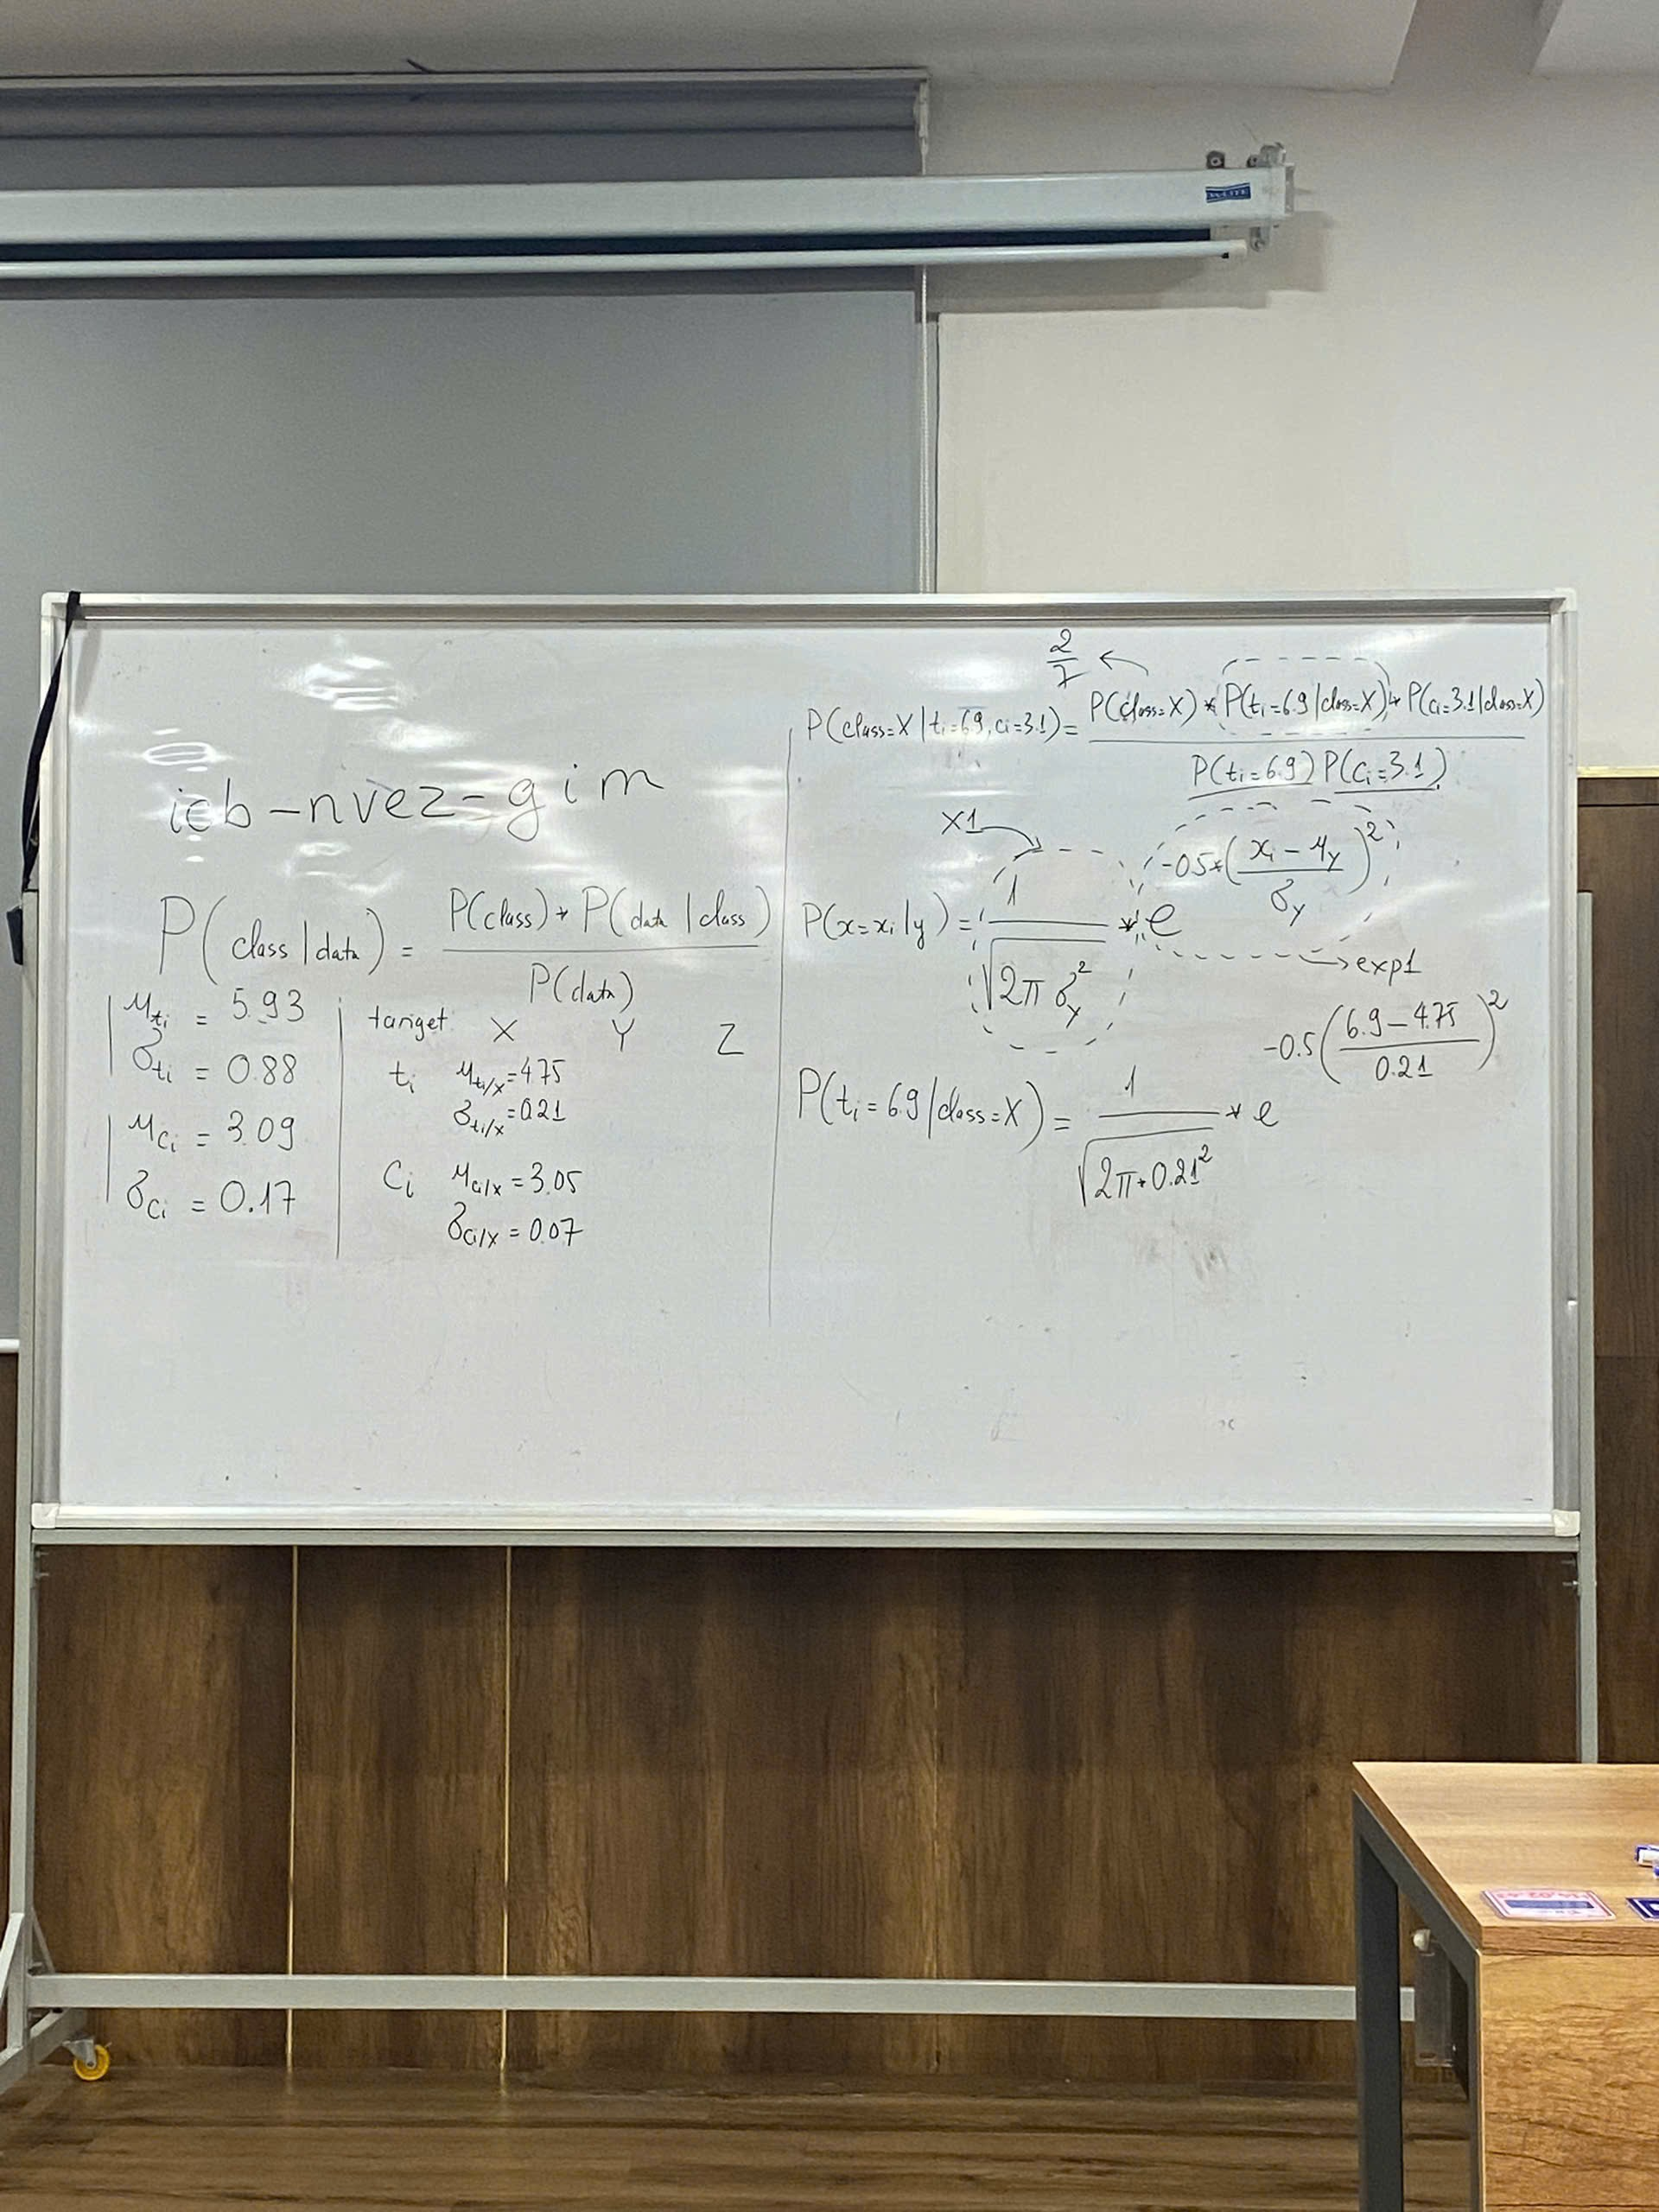

In [11]:
import scipy.stats as gaus
import numpy as np

# Tính xác suất cho lớp X
vclassX = (2 / 7) * gaus.norm(4.75, 0.212132).pdf(6.9) * gaus.norm(3.050000, 0.070711).pdf(3.1)
vclassX = vclassX / (gaus.norm(5.928571, 0.875051).pdf(6.9) * gaus.norm(3.085714, 0.167616).pdf(3.1))
print(f"Xác suất lớp X: {vclassX}")

# Tính xác suất cho lớp Y
vclassY = (2 / 7) * gaus.norm(6.7, 0.424264).pdf(6.9) * gaus.norm(3.050000, 0.212132).pdf(3.1)
vclassY = vclassY / (gaus.norm(5.928571, 0.875051).pdf(6.9) * gaus.norm(3.085714, 0.167616).pdf(3.1))
print(f"Xác suất lớp Y: {vclassY}")

# Tính xác suất cho lớp Z
vclassZ = (3 / 7) * gaus.norm(6.2, 0.3).pdf(6.9) * gaus.norm(3.133333, 0.230940).pdf(3.1)
vclassZ = vclassZ / (gaus.norm(5.928571, 0.875051).pdf(6.9) * gaus.norm(3.085714, 0.167616).pdf(3.1))
print(f"Xác suất lớp Z: {vclassZ}")

# Tìm lớp có xác suất lớn nhất
maxvalue = np.max([vclassX, vclassY, vclassZ])
print(f"Max Prob: {maxvalue}")

# Xác định lớp dự đoán
if maxvalue == vclassX:
    print("Lớp dự đoán: X")
elif maxvalue == vclassY:
    print("Lớp dự đoán: Y")
else:
    print("Lớp dự đoán: Z")


Xác suất lớp X: 1.999643545551356e-22
Xác suất lớp Y: 0.7532023772787971
Xác suất lớp Z: 0.10969167975389196
Max Prob: 0.7532023772787971
Lớp dự đoán: Y


In [12]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra (60% train, 40% test)
df_train, df_test = train_test_split(df, test_size=0.4, random_state=16)

# Chuẩn bị dữ liệu đầu vào (features) và đầu ra (target) cho tập train
X_train = df_train[['ti', 'ci']].values  # Features
y_train = df_train['drug'].values  # Target

# Đảm bảo dữ liệu đầu vào là kiểu số thực
X_train = X_train.astype(float)


In [13]:
# Khởi tạo và huấn luyện mô hình Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:
X_test = df_test[['ti', 'ci']].values
y_test = df_test['drug'].values

In [15]:
X_test

array([[5.5, 2.3],
       [4.7, 3.2],
       [5.1, 3.5],
       [6.3, 2.5],
       [6.9, 3.1]])

In [16]:
y_test

array(['Y', 'X', 'X', 'Z', 'Y'], dtype=object)

In [17]:
# Dự đoán trên tập test
y_pred = gnb.predict(X_test)

# In kết quả dự đoán và nhãn thực tế
print("Kết quả dự đoán:", y_pred)
print("Nhãn thực tế:", y_test)

# Tính độ chính xác của mô hình
accuracy = gnb.score(X_test, y_test)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")

# Dự đoán cho một mẫu mới [ti=6.9, ci=3.1]
new_sample = [[6.9, 3.1]]
predicted_class = gnb.predict(new_sample)
print(f"Mẫu [6.9, 3.1] được dự đoán là lớp: {predicted_class[0]}")

Kết quả dự đoán: ['Z' 'X' 'Z' 'Z' 'Y']
Nhãn thực tế: ['Y' 'X' 'X' 'Z' 'Y']
Độ chính xác của mô hình: 60.00%
Mẫu [6.9, 3.1] được dự đoán là lớp: Y


In [18]:
df_iris = pd.read_csv("data/iris.csv")
df_iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [19]:
# Tách dữ liệu thành đầu vào (X) và đầu ra (y)
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris['species']

In [20]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
# Khởi tạo và huấn luyện mô hình Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
# Dự đoán trên tập kiểm tra
y_pred = gnb.predict(X_test)

# In kết quả dự đoán và độ chính xác
print("Kết quả dự đoán:", y_pred)
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# In báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))


Kết quả dự đoán: ['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica']
Độ chính xác của mô hình: 96.67%

Báo cáo phân loại:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
# Cho phép người dùng nhập mẫu mới
print("\nNhập thông tin mẫu mới:")
sepal_length = float(input("Nhập sepal_length: "))
sepal_width = float(input("Nhập sepal_width: "))
petal_length = float(input("Nhập petal_length: "))
petal_width = float(input("Nhập petal_width: "))

# Tạo DataFrame cho mẫu mới
new_sample = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], 
                          columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Dự đoán loài hoa cho mẫu mới
predicted_species = gnb.predict(new_sample)

# In kết quả dự đoán cho mẫu mới
print(f"\nMẫu mới được dự đoán là loài: {predicted_species[0]}")


Nhập thông tin mẫu mới:

Mẫu mới được dự đoán là loài: virginica
